## **1. Datasets.**

In [1]:
import re
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForMaskedLM, AutoModelForSequenceClassification
# from transformers import EncoderDecoderModel, BertTokenizer, DistilBertTokenizer
# from transformers import AutoModelForCausalLM

from sklearn.linear_model import LogisticRegression
import numpy as np
from tqdm import tqdm

import sys
import os

# Add the code directory directly to Python path
code_dir = '/Users/elenaericheva/ericheva_git/ccs_aisf/code'
if code_dir not in sys.path:
    sys.path.insert(0, code_dir)

print(f"Added {code_dir} to Python path")

/Users/elenaericheva/ericheva_git/ccs_aisf/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Added /Users/elenaericheva/ericheva_git/ccs_aisf/code to Python path


## **2. Choose model.**

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch


# CHANGED: Clear GPU cache before loading
if torch.backends.mps.is_available():
    torch.mps.empty_cache()
    
LAYER_IDX = 16

# ===== LLAMA 4 SERIES (APRIL 2025) - LATEST MULTIMODAL! =====


print("=== LOADING LLAMA 4 MODELS ===")

# # LLAMA 4 SCOUT - Latest multimodal MoE (17B active, 109B total)
# YOUR_NAME = "Llama-4-Scout"
# llama_tokenizer = AutoTokenizer.from_pretrained(f"meta-llama/{YOUR_NAME}")
# llama_model = AutoModelForCausalLM.from_pretrained(
#     f"meta-llama/{YOUR_NAME}",
#     torch_dtype=torch.bfloat16,
#     device_map="auto",
#     low_cpu_mem_usage=True,       # Reduce CPU memory usage
#     trust_remote_code=True  # May be needed for new MoE architecture
# )
# llama_model.eval()

# llama_tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-4-Scout-Instruct")
# llama_model = AutoModelForCausalLM.from_pretrained(
#     "meta-llama/Llama-4-Scout-Instruct",
#     torch_dtype=torch.bfloat16,
#     device_map="auto",
#     trust_remote_code=True
# )
# llama_model.eval()

# # LLAMA 4 MAVERICK - Best performance MoE (17B active, 400B total)
# llama_tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-4-Maverick")
# llama_model = AutoModelForCausalLM.from_pretrained(
#     "meta-llama/Llama-4-Maverick",
#     torch_dtype=torch.bfloat16,
#     device_map="auto",
#     trust_remote_code=True
# )
# llama_model.eval()

# llama_tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-4-Maverick-Instruct")
# llama_model = AutoModelForCausalLM.from_pretrained(
#     "meta-llama/Llama-4-Maverick-Instruct",
#     torch_dtype=torch.bfloat16,
#     device_map="auto",
#     trust_remote_code=True
# )
# llama_model.eval()

# # ===== LLAMA 3.2 SERIES (SEPTEMBER 2024) - MULTIMODAL =====

# print("=== LOADING LLAMA 3.2 MODELS ===")

# # LLAMA 3.2 1B - Lightweight edge model
# YOUR_NAME = "Llama-3.2-1B"
# llama_tokenizer = AutoTokenizer.from_pretrained(f"meta-llama/{YOUR_NAME}")
# llama_model = AutoModelForCausalLM.from_pretrained(
#     f"meta-llama/{YOUR_NAME}",
#     torch_dtype=torch.bfloat16,
#     device_map="auto",
#     low_cpu_mem_usage=True,       # Reduce CPU memory usage
#     trust_remote_code=True  # May be needed for new MoE architecture
# )
# llama_model.eval()

# llama_tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B-Instruct")
# llama_model = AutoModelForCausalLM.from_pretrained(
#     "meta-llama/Llama-3.2-1B-Instruct",
#     torch_dtype=torch.bfloat16,
#     device_map="auto"
# )
# llama_model.eval()

# # LLAMA 3.2 3B - Edge model
# llama_tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-3B")
# llama_model = AutoModelForCausalLM.from_pretrained(
#     "meta-llama/Llama-3.2-3B",
#     torch_dtype=torch.bfloat16,
#     device_map="auto"
# )
# llama_model.eval()

# llama_tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-3B-Instruct")
# llama_model = AutoModelForCausalLM.from_pretrained(
#     "meta-llama/Llama-3.2-3B-Instruct",
#     torch_dtype=torch.bfloat16,
#     device_map="auto"
# )
# llama_model.eval()

# # ===== LLAMA 3.1 SERIES (JULY 2024) - LARGE TEXT MODELS =====

# print("=== LOADING LLAMA 3.1 MODELS ===")


# # LLAMA 3.1 8B - Base and Instruct
# YOUR_NAME = "Meta-Llama-3.1-8B"
# llama_tokenizer = AutoTokenizer.from_pretrained(f"meta-llama/{YOUR_NAME}")
# llama_model = AutoModelForCausalLM.from_pretrained(
#     f"meta-llama/{YOUR_NAME}",
#     torch_dtype=torch.bfloat16,
#     device_map="auto",
#     low_cpu_mem_usage=True,       # Reduce CPU memory usage
#     trust_remote_code=True  # May be needed for new MoE architecture
# )
# llama_model.eval()

# llama_tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B-Instruct")
# llama_model = AutoModelForCausalLM.from_pretrained(
#     "meta-llama/Meta-Llama-3.1-8B-Instruct",
#     torch_dtype=torch.bfloat16,
#     device_map="auto"
# )
# llama_model.eval()

# # LLAMA 3.1 405B - Massive model (if you have enough GPU memory!)
# llama_tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-405B")
# llama_model = AutoModelForCausalLM.from_pretrained(
#     "meta-llama/Meta-Llama-3.1-405B",
#     torch_dtype=torch.bfloat16,
#     device_map="auto"
# )
# llama_model.eval()

# llama_tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-405B-Instruct")
# llama_model = AutoModelForCausalLM.from_pretrained(
#     "meta-llama/Meta-Llama-3.1-405B-Instruct",
#     torch_dtype=torch.bfloat16,
#     device_map="auto"
# )
# llama_model.eval()

# Llama 3 Model Family (Original - April 2024)
# 8B Models:

# meta-llama/Meta-Llama-3-8B - Base model (8B parameters)
YOUR_NAME = "Meta-Llama-3-8B"
llama_tokenizer = AutoTokenizer.from_pretrained(f"meta-llama/{YOUR_NAME}")
llama_model = AutoModelForCausalLM.from_pretrained(
    f"meta-llama/{YOUR_NAME}",
    torch_dtype=torch.bfloat16,
    device_map="auto",
    low_cpu_mem_usage=True,       # Reduce CPU memory usage
    trust_remote_code=True  # May be needed for new MoE architecture
)
llama_model.eval()
# meta-llama/Meta-Llama-3-8B-Instruct - Instruction-tuned (8B parameters)
# YOUR_NAME = "Meta-Llama-3-8B-Instruct"
# llama_tokenizer = AutoTokenizer.from_pretrained(f"meta-llama/{YOUR_NAME}")
# llama_model = AutoModelForCausalLM.from_pretrained(
#     f"meta-llama/{YOUR_NAME}",
#     torch_dtype=torch.bfloat16,
#     device_map="auto",
#     low_cpu_mem_usage=True,       # Reduce CPU memory usage
#     trust_remote_code=True  # May be needed for new MoE architecture
# )
# llama_model.eval()

# 70B Models:

# meta-llama/Meta-Llama-3-70B - Base model (70B parameters)
# meta-llama/Meta-Llama-3-70B-Instruct - Instruction-tuned (70B parameters)

# Safety Model:

# meta-llama/Llama-Guard-2-8B - Safety classifier based on Llama 3 8B
# YOUR_NAME = "Llama-Guard-2-8B"
# llama_tokenizer = AutoTokenizer.from_pretrained(f"meta-llama/{YOUR_NAME}")
# llama_model = AutoModelForCausalLM.from_pretrained(
#     f"meta-llama/{YOUR_NAME}",
#     torch_dtype=torch.bfloat16,
#     device_map="auto",
#     low_cpu_mem_usage=True,       # Reduce CPU memory usage
#     trust_remote_code=True  # May be needed for new MoE architecture
# )
# llama_model.eval()


=== LOADING LLAMA 4 MODELS ===


Loading checkpoint shards: 100%|██████████| 4/4 [00:15<00:00,  3.76s/it]


LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((4096,), eps=1e-05)
    (rotary_

### **3. Get hidden states**

## **4. Plot.**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from itertools import combinations
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

Set pad_token to eos_token: <|end_of_text|>


Extracting embeddings (strategy: last-token): 100%|██████████| 1244/1244 [03:58<00:00,  5.21it/s]


Extraction completed: shape=(1244, 33, 4096), dtype=float32
Stats: max=55.250, min=-27.375, std=0.503


Extracting embeddings (strategy: last-token): 100%|██████████| 1244/1244 [05:52<00:00,  3.53it/s]


Extraction completed: shape=(1244, 33, 4096), dtype=float32
Stats: max=54.250, min=-24.750, std=0.493
X_pos dtype: float32
X_pos shape: (1244, 33, 4096)
X_neg dtype: float32
X_neg shape: (1244, 33, 4096)
######################################################################################## 
X_pos.max() 55.25
X_pos.min() -27.375
X_pos.mean() -0.00026444677
X_pos.std() 0.5028797
X_pos.median() -0.00012207031
X_neg.max() 54.25
X_neg.min() -24.75
X_neg.mean() -0.0031269237
X_neg.std() 0.4925444
X_neg.median() -0.00041770935
######################################################################################## 
X_pos sample: [-8.7738037e-04 -5.5313110e-04 -1.4603138e-05  1.4114380e-03
  4.5204163e-04]
X_neg sample: [-8.7738037e-04 -5.5313110e-04 -1.4603138e-05  1.4114380e-03
  4.5204163e-04]
Normalization completed!
X_pos_normalized shape: (1244, 33, 4096)
X_neg_normalized shape: (1244, 33, 4096)
X_pos_normalized dtype: float32
X_pos_normalized shape: (1244, 33, 4096)
X_neg_normalized d

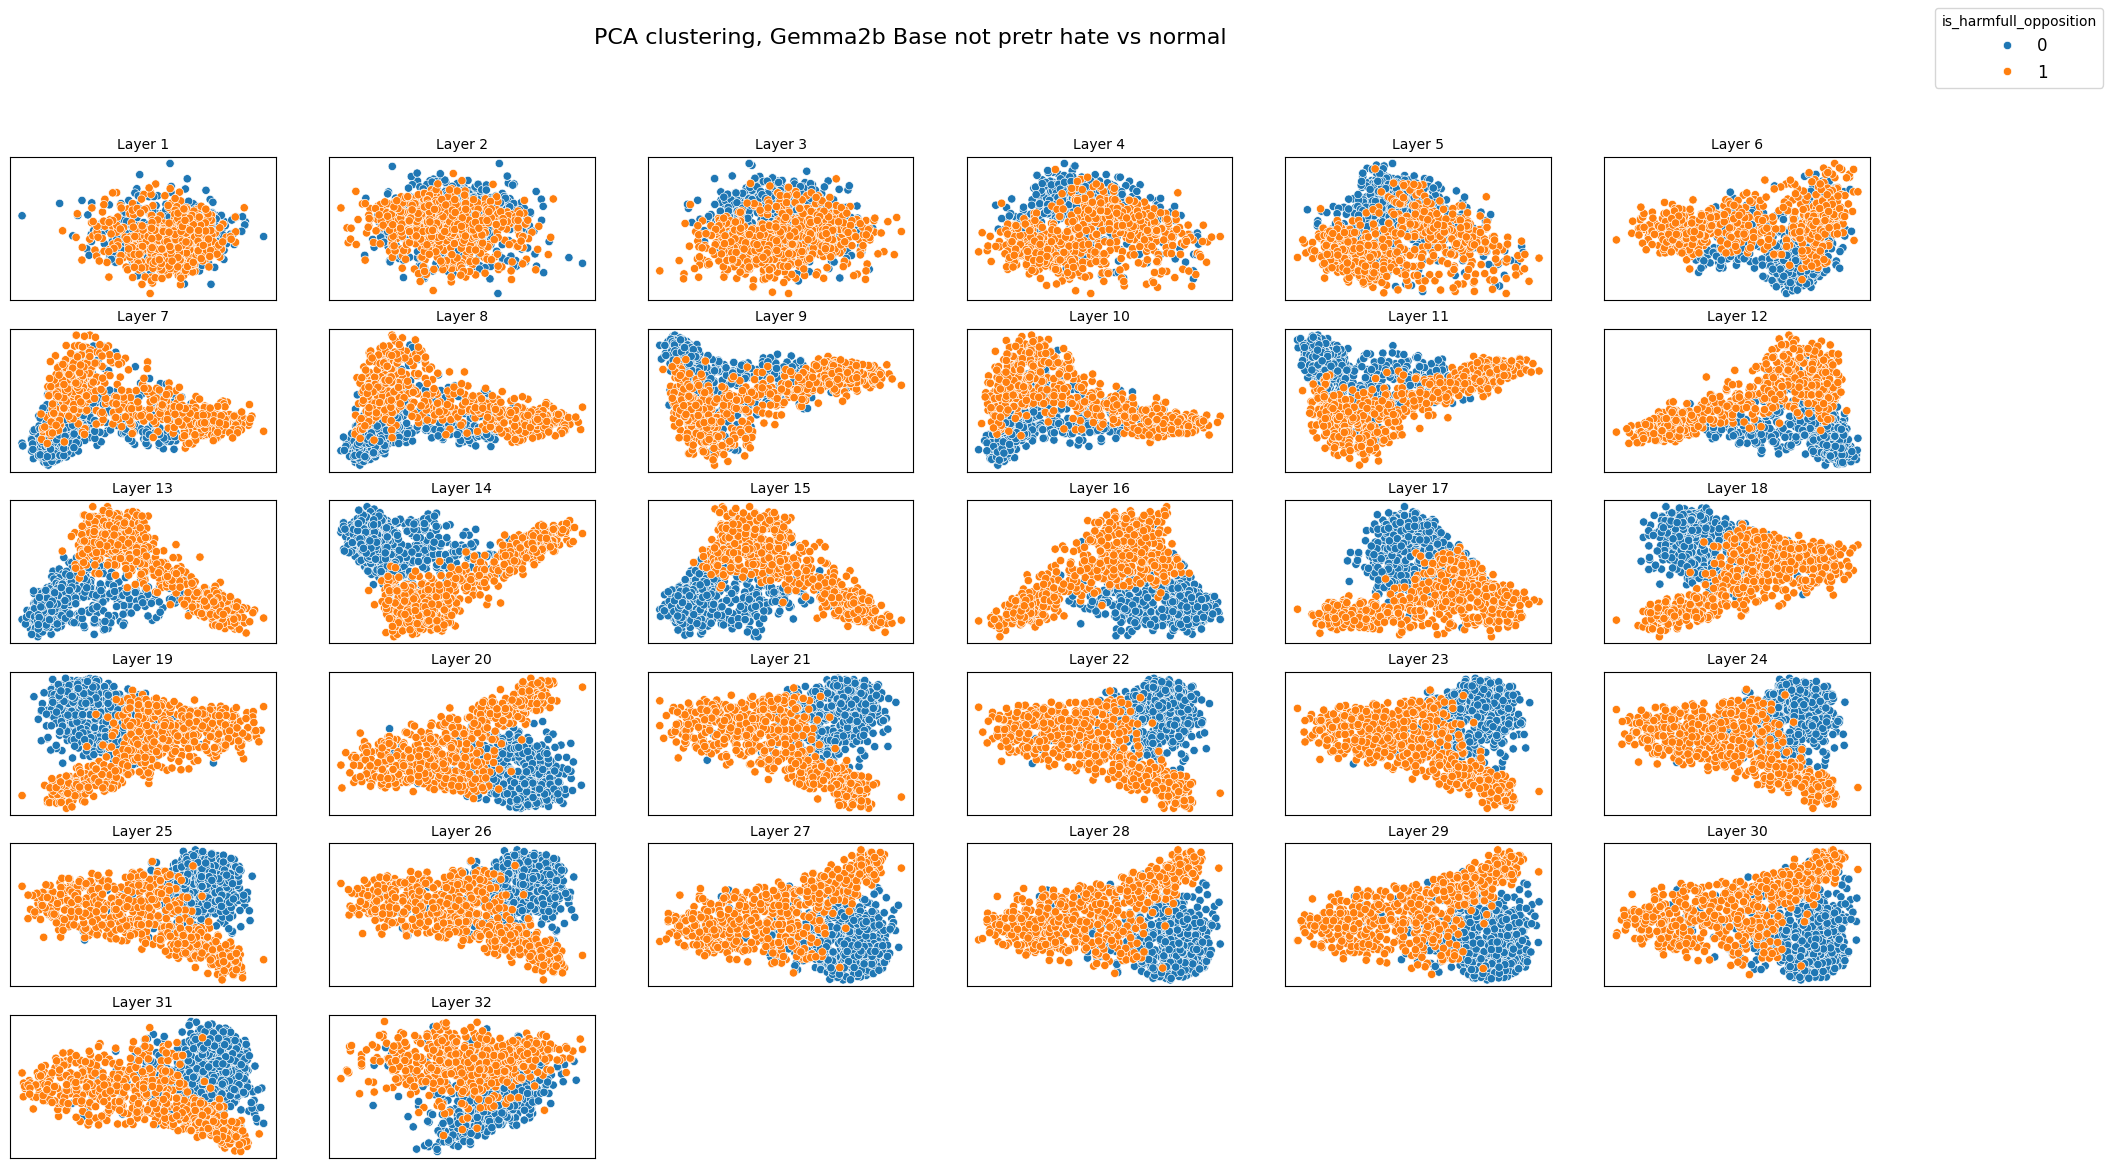

In [4]:
# path to big hate data
hate_data = pd.read_csv('../data/raw/total_hate_data.csv', index_col=0)
hate_data.head(2)

hate_total_yes_data = pd.read_csv('../data/yes_no/hate_total_yes_data.csv', index_col=0)
hate_total_no_data =  pd.read_csv('../data/yes_no/hate_total_no_data.csv', index_col=0)

from extract_fixed_llama import vectorize_df, extract_representation

X_pos = vectorize_df(hate_total_yes_data['statement'],
                     llama_model,
                     llama_tokenizer,
                     layer_index=None,
                     strategy="last-token",      # CHANGED: Use last-token for decoder
                     model_type='decoder',       # CHANGED: Gemma is decoder, not encoder
                     use_decoder=False,          # CHANGED: Not needed for decoder-only
                     get_all_hs=True,
                     device=None)

X_neg = vectorize_df(hate_total_no_data['statement'],
                     llama_model,
                     llama_tokenizer,
                     layer_index=None,
                     strategy="last-token",      # CHANGED: Use last-token for decoder
                     model_type='decoder',       # CHANGED: Gemma is decoder, not encoder
                     use_decoder=False,          # CHANGED: Not needed for decoder-only
                     get_all_hs=True,
                     device=None)

import numpy as np

np.savez_compressed(f'{YOUR_NAME}_neg.npz', X_neg)
np.savez_compressed(f'{YOUR_NAME}_pos.npz', X_pos)

# Load the files correctly
X_pos_file = np.load(f'{YOUR_NAME}_pos.npz')
X_neg_file = np.load(f'{YOUR_NAME}_neg.npz')

# Extract the actual arrays
X_pos = X_pos_file['arr_0']
X_neg = X_neg_file['arr_0']

# Check data types and shapes first
print("X_pos dtype:", X_pos.dtype)
print("X_pos shape:", X_pos.shape)
print("X_neg dtype:", X_neg.dtype)
print("X_neg shape:", X_neg.shape)

print("######################################################################################## ")
print("X_pos.max()", X_pos.max())
print("X_pos.min()", X_pos.min())
print("X_pos.mean()", X_pos.mean())
print("X_pos.std()", X_pos.std())
print("X_pos.median()", np.median(X_pos))
print("X_neg.max()", X_neg.max())
print("X_neg.min()", X_neg.min())
print("X_neg.mean()", X_neg.mean())
print("X_neg.std()", X_neg.std())
print("X_neg.median()", np.median(X_neg))
print("######################################################################################## ")

# Check for any issues with the data
print("X_pos sample:", X_pos.flat[:5])
print("X_neg sample:", X_neg.flat[:5])

# Convert to proper numeric type if needed
X_pos = X_pos.astype(np.float32)
X_neg = X_neg.astype(np.float32)

n_samples, n_layers, n_features = X_pos.shape

# Normalize the data
X_pos_normalized = X_pos.reshape(-1, X_pos.shape[-1])         # (512*25, 768)
X_pos_normalized = normalize(X_pos_normalized, norm='l2', axis=1).reshape(X_pos.shape)

X_neg_normalized = X_neg.reshape(-1, X_neg.shape[-1])         # (512*25, 768)
X_neg_normalized = normalize(X_neg_normalized, norm='l2', axis=1).reshape(X_neg.shape)

print("Normalization completed!")
print("X_pos_normalized shape:", X_pos_normalized.shape)
print("X_neg_normalized shape:", X_neg_normalized.shape)

# Check data types and shapes first
print("X_pos_normalized dtype:", X_pos_normalized.dtype)
print("X_pos_normalized shape:", X_pos_normalized.shape)
print("X_neg_normalized dtype:", X_neg_normalized.dtype)
print("X_neg_normalized shape:", X_neg_normalized.shape)

print("######################################################################################## ")
print("X_pos_normalized.max()", X_pos_normalized.max())
print("X_pos_normalized.min()", X_pos_normalized.min())
print("X_pos_normalized.mean()", X_pos_normalized.mean())
print("X_pos_normalized.std()", X_pos_normalized.std())
print("X_pos_normalized.median()", np.median(X_pos_normalized))
print("X_neg_normalized.max()", X_neg_normalized.max())
print("X_neg_normalized.min()", X_neg_normalized.min())
print("X_neg_normalized.mean()", X_neg_normalized.mean())
print("X_neg_normalized.std()", X_neg_normalized.std())
print("X_neg_normalized.median()", np.median(X_neg_normalized))
print("######################################################################################## ")

# Verify normalization worked - check L2 norms
print("X_pos_normalized sample norms:", np.linalg.norm(X_pos_normalized.reshape(-1, n_features)[:5], axis=1))
print("X_neg_normalized sample norms:", np.linalg.norm(X_neg_normalized.reshape(-1, n_features)[:5], axis=1))

# Plot PCA
from format_results_fixed import plot_pca_or_tsne_layerwise
plot_pca_or_tsne_layerwise(X_pos_normalized,
                           X_neg_normalized,
                           hate_data['is_harmfull_opposition'],
                           standardize=False, n_components=5,
                           components=[0, 1], mode='pca',
                           plot_title='PCA clustering, Gemma2b Base not pretr hate vs normal')

## **5. Find best CCS**


To find the best layers, train CCS on all hidden states. You can use different normalization strategies, the best in experiments was l2 + median.

Median normalize used
Layer 1/33, CCS accuracy: 0.5381526104417671
Median normalize used
Layer 2/33, CCS accuracy: 0.5341365461847389
Median normalize used
Layer 3/33, CCS accuracy: 0.5381526104417671
Median normalize used
Layer 4/33, CCS accuracy: 0.6265060240963856
Median normalize used
Layer 5/33, CCS accuracy: 0.6626506024096386
Median normalize used
Layer 6/33, CCS accuracy: 0.6706827309236948
Median normalize used
Layer 7/33, CCS accuracy: 0.6827309236947792
Median normalize used
Layer 8/33, CCS accuracy: 0.6586345381526104
Median normalize used
Layer 9/33, CCS accuracy: 0.6546184738955824
Median normalize used
Layer 10/33, CCS accuracy: 0.6586345381526104
Median normalize used
Layer 11/33, CCS accuracy: 0.6546184738955823
Median normalize used
Layer 12/33, CCS accuracy: 0.6626506024096386
Median normalize used
Layer 13/33, CCS accuracy: 0.6706827309236948
Median normalize used
Layer 14/33, CCS accuracy: 0.9397590361445783
Median normalize used
Layer 15/33, CCS accuracy: 0.947791

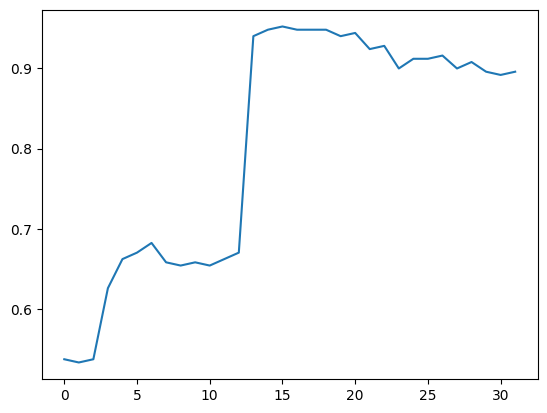

In [5]:
import random
import numpy as np
import torch
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from ccs import CCS, train_ccs_on_hidden_states



SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# Train-test indexes (for all experiments)
idx = np.arange(len(X_pos_normalized))
train_idx, test_idx = train_test_split(idx, test_size=0.2, random_state=71, shuffle=True)


# train CCS on normalized states
orig_ccs = train_ccs_on_hidden_states(X_pos_normalized,
                                        X_neg_normalized,
                                        hate_data['is_harmfull_opposition'],
                                         train_idx,
                                         test_idx,
                                        normalizing='median')

with open(f'ccs_{YOUR_NAME}_mixed_data_results.pkl', 'wb') as f:
    pickle.dump(orig_ccs, f)

acc = []
for layer_idx in range(llama_model.config.num_hidden_layers):
    acc.append(orig_ccs[layer_idx]['accuracy'])

plt.plot(acc)
plt.show()

LAYER_IDX = np.argmax(acc)


After that, we train the CCS on the selected layer to obtain the probe and its weights.

In [6]:
from ccs import CCS, train_ccs_on_hidden_states
from sklearn.model_selection import train_test_split
import random


X_pos_normalized_data = pd.DataFrame(X_pos_normalized[:, LAYER_IDX])
X_neg_normalized_data = pd.DataFrame(X_neg_normalized[:, LAYER_IDX])

# Train-test indexes (for all experiments)
idx = np.arange(len(X_pos_normalized))
train_idx, test_idx = train_test_split(idx, test_size=0.2, random_state=71, shuffle=True)


# Train-Test indexes
X_pos_norm_train = X_pos_normalized_data.loc[train_idx, :].values.astype(np.float32)
X_pos_norm_test  = X_pos_normalized_data.loc[test_idx, :].values.astype(np.float32)

X_neg_norm_train = X_neg_normalized_data.loc[train_idx, :].values.astype(np.float32)
X_neg_norm_test  = X_neg_normalized_data.loc[test_idx, :].values.astype(np.float32)

y_train = hate_data['is_harmfull_opposition'][train_idx]
y_test  = hate_data['is_harmfull_opposition'][test_idx]

# Median normalizing
X_pos_norm_train -= np.median(X_pos_norm_train)
X_pos_norm_test -= np.median(X_pos_norm_train)

X_neg_norm_train -= np.median(X_neg_norm_train)
X_neg_norm_test -= np.median(X_neg_norm_train)

# Train CCS without labels first NEG, after POS!
ccs = CCS(X_neg_norm_train, X_pos_norm_train, y_train.values, var_normalize=False, lambda_classification=0, predict_normalize=False)
ccs.repeated_train()

# Evaluate
ccs_acc = ccs.get_acc(X_neg_norm_test, X_pos_norm_test, y_test.values)
print("CCS accuracy: {}".format(ccs_acc))

with open(f'ccs_{YOUR_NAME}_l_{LAYER_IDX}_mixed_data_results.pkl', 'wb') as f:
    pickle.dump(ccs, f)

ccs = pickle.load(open(f'ccs_{YOUR_NAME}_l_{LAYER_IDX}_mixed_data_results.pkl', 'rb'))

CCS accuracy: 0.9558232931726908


# NOT

In [ ]:
# path to big hate data
hate_data = pd.read_csv('../data/raw/total_hate3.0.csv', index_col=0)
hate_data.head(2)

hate_total_yes_data = pd.read_csv('../data/yes_no/hate_total3.0_yes.csv', index_col=0)
hate_total_no_data =  pd.read_csv('../data/yes_no/hate_total3.0_no.csv', index_col=0)



from extract_fixed_llama import vectorize_df, extract_representation

X_pos = vectorize_df(hate_total_yes_data['statement'],
                     llama_model,
                     llama_tokenizer,
                     layer_index=None,
                     strategy="last-token",      # CHANGED: Use last-token for decoder
                     model_type='decoder',       # CHANGED: Gemma is decoder, not encoder
                     use_decoder=False,          # CHANGED: Not needed for decoder-only
                     get_all_hs=True,
                     device=None)

X_neg = vectorize_df(hate_total_no_data['statement'],
                     llama_model,
                     llama_tokenizer,
                     layer_index=None,
                     strategy="last-token",      # CHANGED: Use last-token for decoder
                     model_type='decoder',       # CHANGED: Gemma is decoder, not encoder
                     use_decoder=False,          # CHANGED: Not needed for decoder-only
                     get_all_hs=True,
                     device=None)

np.savez_compressed(f'{YOUR_NAME}_neg_not.npz', X_neg)
np.savez_compressed(f'{YOUR_NAME}_pos_not.npz', X_pos)

# Load the files correctly
X_pos_file = np.load(f'{YOUR_NAME}_pos_not.npz')
X_neg_file = np.load(f'{YOUR_NAME}_neg_not.npz')

# Extract the actual arrays
X_pos = X_pos_file['arr_0']
X_neg = X_neg_file['arr_0']




# Check data types and shapes first
print("X_pos dtype:", X_pos.dtype)
print("X_pos shape:", X_pos.shape)
print("X_neg dtype:", X_neg.dtype)
print("X_neg shape:", X_neg.shape)

print("######################################################################################## ")
print("X_pos.max()", X_pos.max())
print("X_pos.min()", X_pos.min())
print("X_pos.mean()", X_pos.mean())
print("X_pos.std()", X_pos.std())
print("X_pos.median()", np.median(X_pos))
print("X_neg.max()", X_neg.max())
print("X_neg.min()", X_neg.min())
print("X_neg.mean()", X_neg.mean())
print("X_neg.std()", X_neg.std())
print("X_neg.median()", np.median(X_neg))
print("######################################################################################## ")

# Check for any issues with the data
print("X_pos sample:", X_pos.flat[:5])
print("X_neg sample:", X_neg.flat[:5])

# Convert to proper numeric type if needed
X_pos = X_pos.astype(np.float32)
X_neg = X_neg.astype(np.float32)

n_samples, n_layers, n_features = X_pos.shape

# Normalize the data
X_pos_normalized = X_pos.reshape(-1, X_pos.shape[-1])         # (512*25, 768)
X_pos_normalized = normalize(X_pos_normalized, norm='l2', axis=1).reshape(X_pos.shape)

X_neg_normalized = X_neg.reshape(-1, X_neg.shape[-1])         # (512*25, 768)
X_neg_normalized = normalize(X_neg_normalized, norm='l2', axis=1).reshape(X_neg.shape)

print("Normalization completed!")
print("X_pos_normalized shape:", X_pos_normalized.shape)
print("X_neg_normalized shape:", X_neg_normalized.shape)

# Check data types and shapes first
print("X_pos_normalized dtype:", X_pos_normalized.dtype)
print("X_pos_normalized shape:", X_pos_normalized.shape)
print("X_neg_normalized dtype:", X_neg_normalized.dtype)
print("X_neg_normalized shape:", X_neg_normalized.shape)

print("######################################################################################## ")
print("X_pos_normalized.max()", X_pos_normalized.max())
print("X_pos_normalized.min()", X_pos_normalized.min())
print("X_pos_normalized.mean()", X_pos_normalized.mean())
print("X_pos_normalized.std()", X_pos_normalized.std())
print("X_pos_normalized.median()", np.median(X_pos_normalized))
print("X_neg_normalized.max()", X_neg_normalized.max())
print("X_neg_normalized.min()", X_neg_normalized.min())
print("X_neg_normalized.mean()", X_neg_normalized.mean())
print("X_neg_normalized.std()", X_neg_normalized.std())
print("X_neg_normalized.median()", np.median(X_neg_normalized))
print("######################################################################################## ")

# Verify normalization worked - check L2 norms
print("X_pos_normalized sample norms:", np.linalg.norm(X_pos_normalized.reshape(-1, n_features)[:5], axis=1))
print("X_neg_normalized sample norms:", np.linalg.norm(X_neg_normalized.reshape(-1, n_features)[:5], axis=1))

# Plot PCA
from format_results_fixed import plot_pca_or_tsne_layerwise
plot_pca_or_tsne_layerwise(X_pos_normalized,
                           X_neg_normalized,
                           hate_data['is_harmfull_opposition'],
                           standardize=False, n_components=5,
                           components=[0, 1], mode='pca',
                           plot_title='PCA clustering, DeBerta Base not pretr hate vs normal')




Extracting embeddings (strategy: last-token): 100%|██████████| 1250/1250 [01:42<00:00, 12.16it/s]


Extraction completed: shape=(1250, 33, 4096), dtype=float32
Stats: max=51.750, min=-26.125, std=0.505


Extracting embeddings (strategy: last-token): 100%|██████████| 1250/1250 [02:11<00:00,  9.52it/s]


Extraction completed: shape=(1250, 33, 4096), dtype=float32
Stats: max=57.000, min=-24.500, std=0.493


In [ ]:
from ccs import CCS, train_ccs_on_hidden_states
from sklearn.model_selection import train_test_split
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# Train-test indexes (for all experiments)
idx = np.arange(len(X_pos_normalized))
train_idx, test_idx = train_test_split(idx, test_size=0.15, random_state=71, shuffle=True)


# train CCS on normalized states
orig_ccs = train_ccs_on_hidden_states(X_pos_normalized,
                                        X_neg_normalized,
                                        hate_data['is_harmfull_opposition'],
                                         train_idx,
                                         test_idx,
                                        normalizing='median')
with open(f'ccs_{YOUR_NAME}_not_data_results.pkl', 'wb') as f:
    pickle.dump(orig_ccs, f)
    


In [ ]:
from ccs import CCS
import random

X_pos_normalized_data = pd.DataFrame(X_pos_normalized[:, LAYER_IDX])
X_neg_normalized_data = pd.DataFrame(X_neg_normalized[:, LAYER_IDX])


# Train-Test indexes
X_pos_norm_train = X_pos_normalized_data.loc[train_idx, :].values.astype(np.float32)
X_pos_norm_test  = X_pos_normalized_data.loc[test_idx, :].values.astype(np.float32)

X_neg_norm_train = X_neg_normalized_data.loc[train_idx, :].values.astype(np.float32)
X_neg_norm_test  = X_neg_normalized_data.loc[test_idx, :].values.astype(np.float32)

y_train = hate_data['is_harmfull_opposition'][train_idx]
y_test  = hate_data['is_harmfull_opposition'][test_idx]

# Median normalizing
X_pos_norm_train -= np.median(X_pos_norm_train)
X_pos_norm_test -= np.median(X_pos_norm_train)

X_neg_norm_train -= np.median(X_neg_norm_train)
X_neg_norm_test -= np.median(X_neg_norm_train)

# Train CCS without labels first NEG, after POS!
ccs = CCS(X_neg_norm_train, X_pos_norm_train, y_train.values, var_normalize=False, lambda_classification=0, predict_normalize=False)
ccs.repeated_train()

# Evaluate
ccs_acc = ccs.get_acc(X_neg_norm_test, X_pos_norm_test, y_test.values)
print("CCS accuracy: {}".format(ccs_acc))

# TTT

In [ ]:
# path to big hate data
# path to big hate data
hate_data = pd.read_csv('../data/raw/total_hate3.0.csv', index_col=0)
hate_data.head(2)

hate_total_yes_data = pd.read_csv('../data/yes_no/hate_total3.0_yes.csv', index_col=0)
hate_total_no_data =  pd.read_csv('../data/yes_no/hate_total3.0_no.csv', index_col=0)

hate_total_yes_data['statement'] = hate_total_yes_data['statement'].apply(
                                    lambda x: x.replace('not', 'ttt').replace('Not', 'ttt'))
hate_total_no_data['statement'] = hate_total_no_data['statement'].apply(
                                        lambda x: x.replace('not', 'ttt').replace('Not', 'ttt'))


from extract_fixed_llama import vectorize_df, extract_representation

X_pos = vectorize_df(hate_total_yes_data['statement'],
                     llama_model,
                     llama_tokenizer,
                     layer_index=None,
                     strategy="last-token",      # CHANGED: Use last-token for decoder
                     model_type='decoder',       # CHANGED: Gemma is decoder, not encoder
                     use_decoder=False,          # CHANGED: Not needed for decoder-only
                     get_all_hs=True,
                     device=None)

X_neg = vectorize_df(hate_total_no_data['statement'],
                     llama_model,
                     llama_tokenizer,
                     layer_index=None,
                     strategy="last-token",      # CHANGED: Use last-token for decoder
                     model_type='decoder',       # CHANGED: Gemma is decoder, not encoder
                     use_decoder=False,          # CHANGED: Not needed for decoder-only
                     get_all_hs=True,
                     device=None)

np.savez_compressed(f'{YOUR_NAME}_neg_ttt.npz', X_neg)
np.savez_compressed(f'{YOUR_NAME}_pos_ttt.npz', X_pos)

# Load the files correctly
X_pos_file = np.load(f'{YOUR_NAME}_pos_ttt.npz')
X_neg_file = np.load(f'{YOUR_NAME}_neg_ttt.npz')

# Extract the actual arrays
X_pos = X_pos_file['arr_0']
X_neg = X_neg_file['arr_0']


# Check data types and shapes first
print("X_pos dtype:", X_pos.dtype)
print("X_pos shape:", X_pos.shape)
print("X_neg dtype:", X_neg.dtype)
print("X_neg shape:", X_neg.shape)

print("######################################################################################## ")
print("X_pos.max()", X_pos.max())
print("X_pos.min()", X_pos.min())
print("X_pos.mean()", X_pos.mean())
print("X_pos.std()", X_pos.std())
print("X_pos.median()", np.median(X_pos))
print("X_neg.max()", X_neg.max())
print("X_neg.min()", X_neg.min())
print("X_neg.mean()", X_neg.mean())
print("X_neg.std()", X_neg.std())
print("X_neg.median()", np.median(X_neg))
print("######################################################################################## ")

# Check for any issues with the data
print("X_pos sample:", X_pos.flat[:5])
print("X_neg sample:", X_neg.flat[:5])

# Convert to proper numeric type if needed
X_pos = X_pos.astype(np.float32)
X_neg = X_neg.astype(np.float32)

n_samples, n_layers, n_features = X_pos.shape

# Normalize the data
X_pos_normalized = X_pos.reshape(-1, X_pos.shape[-1])         # (512*25, 768)
X_pos_normalized = normalize(X_pos_normalized, norm='l2', axis=1).reshape(X_pos.shape)

X_neg_normalized = X_neg.reshape(-1, X_neg.shape[-1])         # (512*25, 768)
X_neg_normalized = normalize(X_neg_normalized, norm='l2', axis=1).reshape(X_neg.shape)

print("Normalization completed!")
print("X_pos_normalized shape:", X_pos_normalized.shape)
print("X_neg_normalized shape:", X_neg_normalized.shape)

# Check data types and shapes first
print("X_pos_normalized dtype:", X_pos_normalized.dtype)
print("X_pos_normalized shape:", X_pos_normalized.shape)
print("X_neg_normalized dtype:", X_neg_normalized.dtype)
print("X_neg_normalized shape:", X_neg_normalized.shape)

print("######################################################################################## ")
print("X_pos_normalized.max()", X_pos_normalized.max())
print("X_pos_normalized.min()", X_pos_normalized.min())
print("X_pos_normalized.mean()", X_pos_normalized.mean())
print("X_pos_normalized.std()", X_pos_normalized.std())
print("X_pos_normalized.median()", np.median(X_pos_normalized))
print("X_neg_normalized.max()", X_neg_normalized.max())
print("X_neg_normalized.min()", X_neg_normalized.min())
print("X_neg_normalized.mean()", X_neg_normalized.mean())
print("X_neg_normalized.std()", X_neg_normalized.std())
print("X_neg_normalized.median()", np.median(X_neg_normalized))
print("######################################################################################## ")

# Verify normalization worked - check L2 norms
print("X_pos_normalized sample norms:", np.linalg.norm(X_pos_normalized.reshape(-1, n_features)[:5], axis=1))
print("X_neg_normalized sample norms:", np.linalg.norm(X_neg_normalized.reshape(-1, n_features)[:5], axis=1))

# Plot PCA
from format_results_fixed import plot_pca_or_tsne_layerwise
plot_pca_or_tsne_layerwise(X_pos_normalized,
                           X_neg_normalized,
                           hate_data['is_harmfull_opposition'],
                           standardize=False, n_components=5,
                           components=[0, 1], mode='pca',
                           plot_title='PCA clustering, DeBerta Base not pretr hate vs normal')




In [ ]:
from ccs import CCS, train_ccs_on_hidden_states
from sklearn.model_selection import train_test_split
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# Train-test indexes (for all experiments)
idx = np.arange(len(X_pos_normalized))
train_idx, test_idx = train_test_split(idx, test_size=0.15, random_state=71, shuffle=True)


# train CCS on normalized states
orig_ccs = train_ccs_on_hidden_states(X_pos_normalized,
                                        X_neg_normalized,
                                        hate_data['is_harmfull_opposition'],
                                         train_idx,
                                         test_idx,
                                        normalizing='median')
with open(f'ccs_{YOUR_NAME}_ttt_data_results.pkl', 'wb') as f:
    pickle.dump(orig_ccs, f)
    


In [ ]:
from ccs import CCS
import random

X_pos_normalized_data = pd.DataFrame(X_pos_normalized[:, LAYER_IDX])
X_neg_normalized_data = pd.DataFrame(X_neg_normalized[:, LAYER_IDX])


# Train-Test indexes
X_pos_norm_train = X_pos_normalized_data.loc[train_idx, :].values.astype(np.float32)
X_pos_norm_test  = X_pos_normalized_data.loc[test_idx, :].values.astype(np.float32)

X_neg_norm_train = X_neg_normalized_data.loc[train_idx, :].values.astype(np.float32)
X_neg_norm_test  = X_neg_normalized_data.loc[test_idx, :].values.astype(np.float32)

y_train = hate_data['is_harmfull_opposition'][train_idx]
y_test  = hate_data['is_harmfull_opposition'][test_idx]

# Median normalizing
X_pos_norm_train -= np.median(X_pos_norm_train)
X_pos_norm_test -= np.median(X_pos_norm_train)

X_neg_norm_train -= np.median(X_neg_norm_train)
X_neg_norm_test -= np.median(X_neg_norm_train)

# Train CCS without labels first NEG, after POS!
ccs = CCS(X_neg_norm_train, X_pos_norm_train, y_train.values, var_normalize=False, lambda_classification=0, predict_normalize=False)
ccs.repeated_train()

# Evaluate
ccs_acc = ccs.get_acc(X_neg_norm_test, X_pos_norm_test, y_test.values)
print("CCS accuracy: {}".format(ccs_acc))

## **7. Plot results tables.**

In [ ]:
from format_results import get_results_table
orig_ccs_data = get_results_table(orig_ccs)

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))

plt.plot(orig_ccs_data['accuracy'], label='Orig_CCS')

plt.hlines(1, 0, 7, label='ideal', colors='red', linewidth=3, linestyles=['--'])

plt.xlabel('Layer_number')
plt.ylabel('accuracy score ')
plt.legend(loc='upper right');

In [ ]:
from format_results import get_results_table
orig_ccs_data = get_results_table(orig_ccs)

fig, ax = plt.subplots(figsize=(18, 5))

plt.plot(orig_ccs_data['contradiction idx ↓'], label='Orig_CCS')

plt.hlines(0, 0, 7, label='ideal', colors='red', linewidth=3, linestyles=['--'])

plt.xlabel('Layer_number')
plt.ylabel('Contradiction idx score ')
plt.legend(loc='upper right');

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))

plt.plot(orig_ccs_data['agreement_score ↓'], label='Orig_CCS')

plt.hlines(0, 0, 7, label='ideal', colors='red', linewidth=3, linestyles=['--'])

plt.xlabel('Layer_number')
plt.ylabel('Agreement score ')
plt.legend(loc='upper right');